# Wine Quality

# 0. Постановка задачи

Датасет состоит из данных о красных и белых винах. Задача состоит в том, что по метрикам нужно предсказать качество вина (от 0 до 10), определенное специалистами, на основе физико-химических показателей.

# 1. Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("winequality.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

# 2. Визуализация данных и вычисление основных характеристик

In [4]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  good  color  
0         9.4        5     0    red  
1         9.8        5     0    red  
2         9.8        5     0    red  
3         9.8        6     0    red  
4         9.4        5     0    red  
...       ...      ...   ...    ...  
6492     11.2        6     0  white  
6493      9.6        5     0  white  
6494      9.4        6     0  white  
6495     12.8        7     1  white  
6496     11.8        6     0  white  

[6497 rows x 14 columns]

Датасет содержит 6497 записей, 14 признаков

In [5]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')


Вино имеет следующие признаки:

1 - Фиксированная кислотность (fixed acidity): наличие неиспаряемых кислот.

2 - Летучая кислотность (volatile acidity): количество испаряемой уксусной кислоты в вине.

3 - Лимонная кислота (citric acid): наличие лимонной кислоты в вине; в небольших количествах лимонная кислота может придавать винам «свежесть» и аромат.

4 - Остаточный сахар (residual sugar): количество сахара, остающегося после остановки брожения.

5 - Хлориды (chlorides): количество соли в вине.

6 - Количество диоксида серы свободной формы (free sulfur dioxide): Свободная форма SO2, находится в равновесии между молекулярной формой и формой бисульфатного иона. Предотвращает рост микробов и окисление вина.

7 - Общее количество диоксида серы (total sulfur dioxide): Количество свободных и связанных форм S02. В низких концентрациях SO2 в основном не обнаруживается в вине, но при концентрациях свободного SO2 более 50 частей на миллион SO2 становится заметным в носу и вкусе вина.

8 - Плотность (density)

9 - pH: Описывает, насколько кислое или щелочное вино по шкале от 0 (очень кислая) до 14 (очень щелочная).

10 - Сульфаты (sulfates): Содержание сульфатов (добавка, которая может способствовать повышению уровня газообразного диоксида серы)

11 - Алкоголь (alcohol): процентное содержание алкоголя в вине

12 - Качество вина (quality): показатель качества вина, выставленный экспертами. Принимает значения от 0 (плохое) до 10 (хорошее)

13 - Категория вина (good): вино считается хорошим, если quality не меньше 7.

14 - Цвет вина (color): Белое или красное

Мы будем предсказывать 12 признак (quality) - качество вина. И не будем рассматривать 13 признак (good) в работе классификатора, так как он зависит только от quality.

Так как признак *good* вычисляется на основе признака *quality*, который нужно предсказать, имеет смысл его исключить

In [7]:
data = data.drop(['good'], axis = 1)

In [8]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [9]:
data['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

У нас несбалансированный набор данных, данных белого вина почти в три раза больше, чем красного

In [10]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Набор данных также несбалансирован в отношении качества вина. Минимальное качество вина - 3, а максимальное 9. В датасете отсутствуют данные о винах, которые имеют качества 0, 1, 2, а большинство вин имеет качество от 5 до 7.
Выведем значения качечества при разделении по цвету вина.

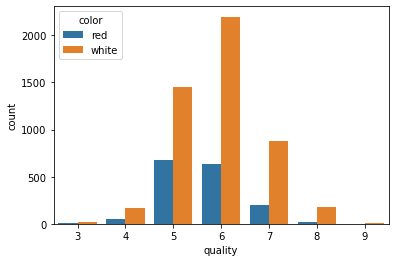

In [11]:
sns.countplot(x="quality", hue="color", data=data)
pass

Действительно, для вин наиболее часто встречается качество от 5 до 7. Однако между данными красного и белого вина можно найти некоторые различия: для красного отсутствуют значения больше 8, а также видна разница в значениях качества 5 и 6 между двумя типами. Можно предположить, что есть некоторая зависимость качества вина от цвета. *(Разница между белыми и красными винами начинается с того, что их производят разными способами. Белые вина производятся исключительно путём брожения виноградного сока, а в производстве красных используют сок, который также содержит кожицу и косточки винограда, которые и придают вину красный цвет)*

#### Обработка выбросов

Определим для каких признаков присутствуют выбросы.

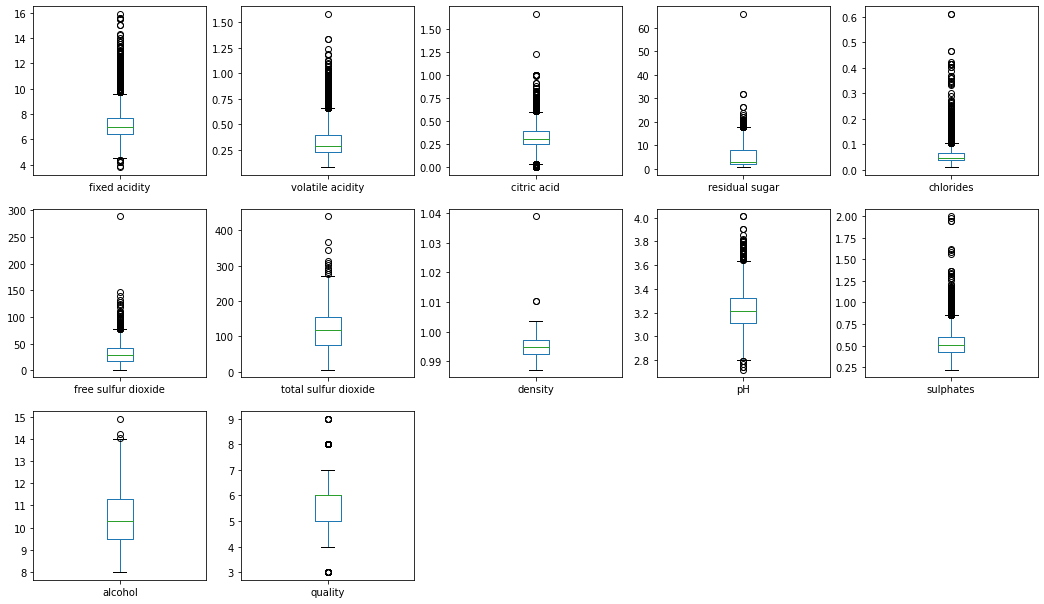

In [12]:
data.plot(kind="box", subplots=True, layout=(5,5), figsize=(18,18))
pass

На графиках можно увидеть распределение значений для каждого признака. Для некоторых параметров, например *residual sugar* или *free sulfur dioxide*,  есть несколько точек, далеких от основного скопления. Для наиболее точного предсказания, такие значения лучше убрать. 

Чтобы точнее понимать, где присутствуют выбросы необходимо получить численную оценку распределения.
Для этого разобьем каждый признак на квантили и выведем в таблицу, указав максимальное и минимальное значения для каждого из них:

In [13]:
q_data = data.quantile([0.005, 0.1, 0.3, 0.5, 0.7, 0.9, 0.995])
pd.concat(objs = [data.agg(['min']), q_data, data.agg(['max'])], join = 'inner')

fixed acidity  volatile acidity  citric acid  residual sugar  \
min            3.800             0.080         0.00             0.6   
0.005          4.948             0.115         0.00             0.8   
0.1            6.000             0.180         0.14             1.3   
0.3            6.500             0.240         0.26             2.0   
0.5            7.000             0.290         0.31             3.0   
0.7            7.500             0.370         0.37             7.1   
0.9            8.800             0.590         0.49            13.0   
0.995         12.700             0.965         0.74            19.4   
max           15.900             1.580         1.66            65.8   

       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
min      0.00900                  1.0                   6.0  0.98711  2.72   
0.005    0.01848                  3.0                   9.0  0.98862  2.86   
0.1      0.03100                  9.0                  30.0  0.99067  3.02   
0.3      0.04000                 19.0                  89.0  0.99280  3.13   
0.5      0.04700                 29.0                 118.0  0.99489  3.21   
0.7      0.05800                 38.0                 148.0  0.99655  3.30   
0.9      0.08600                 54.0                 188.0  0.99840  3.42   
0.995    0.24204                 86.0                 247.0  1.00140  3.70   
max      0.61100                289.0                 440.0  1.03898  4.01   

       sulphates  alcohol  quality  
min       0.2200      8.0      3.0  
0.005     0.2800      8.6      4.0  
0.1       0.3700      9.1      5.0  
0.3       0.4500      9.6      5.0  
0.5       0.5100     10.3      6.0  
0.7       0.5800     11.1      6.0  
0.9       0.7200     12.3      7.0  
0.995     1.1252     13.6      8.0  
max       2.0000     14.9      9.0

Очевидно, что выбросы присутствуют не по всем параметрам - например для *pH*, максимальное значение не столь значительно отличается от квантиля 99.5%. И, напротив, *free sulfur dioxide* максимальное значение больше более, чем в два раза. Поэтому логичнее убирать только записи с очевидними значениями выбросов. Причем, по нижней границе (минимому и 0.5%)- очевидных выбросов нет ни по одному параметру.

In [14]:
outliers = data[
(data['fixed acidity'] > data['fixed acidity'].quantile(0.995)) |
(data['volatile acidity'] > data['volatile acidity'].quantile(0.995)) |
(data['citric acid'] > data['citric acid'].quantile(0.995)) |
(data['residual sugar'] > data['residual sugar'].quantile(0.995)) |
(data['chlorides'] > data['chlorides'].quantile(0.995)) |
(data['free sulfur dioxide'] > data['free sulfur dioxide'].quantile(0.995)) |
(data['total sulfur dioxide'] > data['total sulfur dioxide'].quantile(0.995)) |
(data['density'] > data['density'].quantile(0.995)) |
(data['sulphates'] > data['sulphates'].quantile(0.995))
]
outliers

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8              0.61         0.29             1.6      0.114   
17              8.1              0.56         0.28             1.7      0.368   
19              7.9              0.32         0.51             1.8      0.341   
38              5.7              1.13         0.09             1.5      0.172   
42              7.5              0.49         0.20             2.6      0.332   
...             ...               ...          ...             ...        ...   
6190            7.0              0.33         0.78             9.9      0.042   
6225            6.3              0.30         0.91             8.2      0.034   
6231            6.3              0.30         0.91             8.2      0.034   
6344            6.1              0.26         0.25             2.9      0.047   
6440            5.7              0.22         0.25             1.1      0.050   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
13                    9.0                  29.0  0.99740  3.26       1.56   
17                   16.0                  56.0  0.99680  3.11       1.28   
19                   17.0                  56.0  0.99690  3.04       1.08   
38                    7.0                  19.0  0.99400  3.50       0.48   
42                    8.0                  14.0  0.99680  3.21       0.90   
...                   ...                   ...      ...   ...        ...   
6190                 21.0                 251.0  0.99435  3.01       0.55   
6225                 50.0                 199.0  0.99394  3.39       0.49   
6231                 50.0                 199.0  0.99394  3.39       0.49   
6344                289.0                 440.0  0.99314  3.44       0.64   
6440                 97.0                 175.0  0.99099  3.44       0.62   

      alcohol  quality  color  
13        9.1        5    red  
17        9.3        5    red  
19        9.2        6    red  
38        9.8        4    red  
42       10.5        6    red  
...       ...      ...    ...  
6190     11.0        6  white  
6225     11.7        6  white  
6231     11.7        6  white  
6344     10.5        3  white  
6440     11.1        6  white  

[235 rows x 13 columns]

In [15]:
outliers.shape, outliers['color'].value_counts()

((235, 13),
 white    118
 red      117
 Name: color, dtype: int64)

Итак, были определены 235 записи с выбросами. Причем, получилось почти одинаковое количество таких данных как для белого, так и для красного вина.
Теперь посмотрим на данные без выбросов:

In [16]:
crop_data = data.drop(outliers.index)
crop_data.shape, crop_data['color'].value_counts()

((6262, 13),
 white    4780
 red      1482
 Name: color, dtype: int64)

И построим для демострации распределение для каких-нибудь признаков:

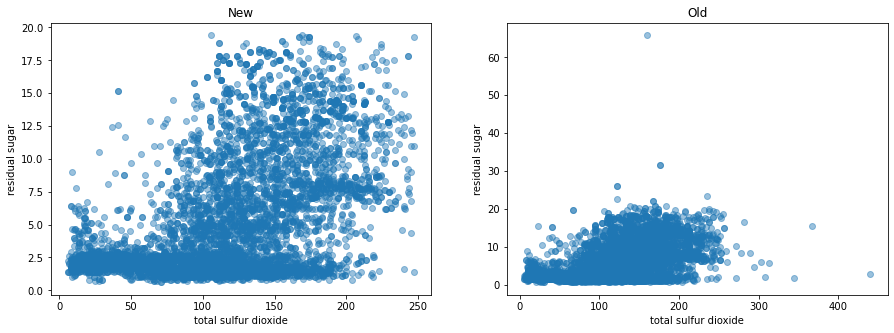

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(crop_data['total sulfur dioxide'], crop_data['residual sugar'], alpha = 0.45)
ax1.set_xlabel('total sulfur dioxide')
ax1.set_ylabel('residual sugar')
ax1.set_title('New')
ax2.scatter(data['total sulfur dioxide'], data['residual sugar'], alpha = 0.45)
ax2.set_xlabel('total sulfur dioxide')
ax2.set_ylabel('residual sugar')
ax2.set_title('Old')
pass


Теперь можно посмотреть на диаграмму рассеивания

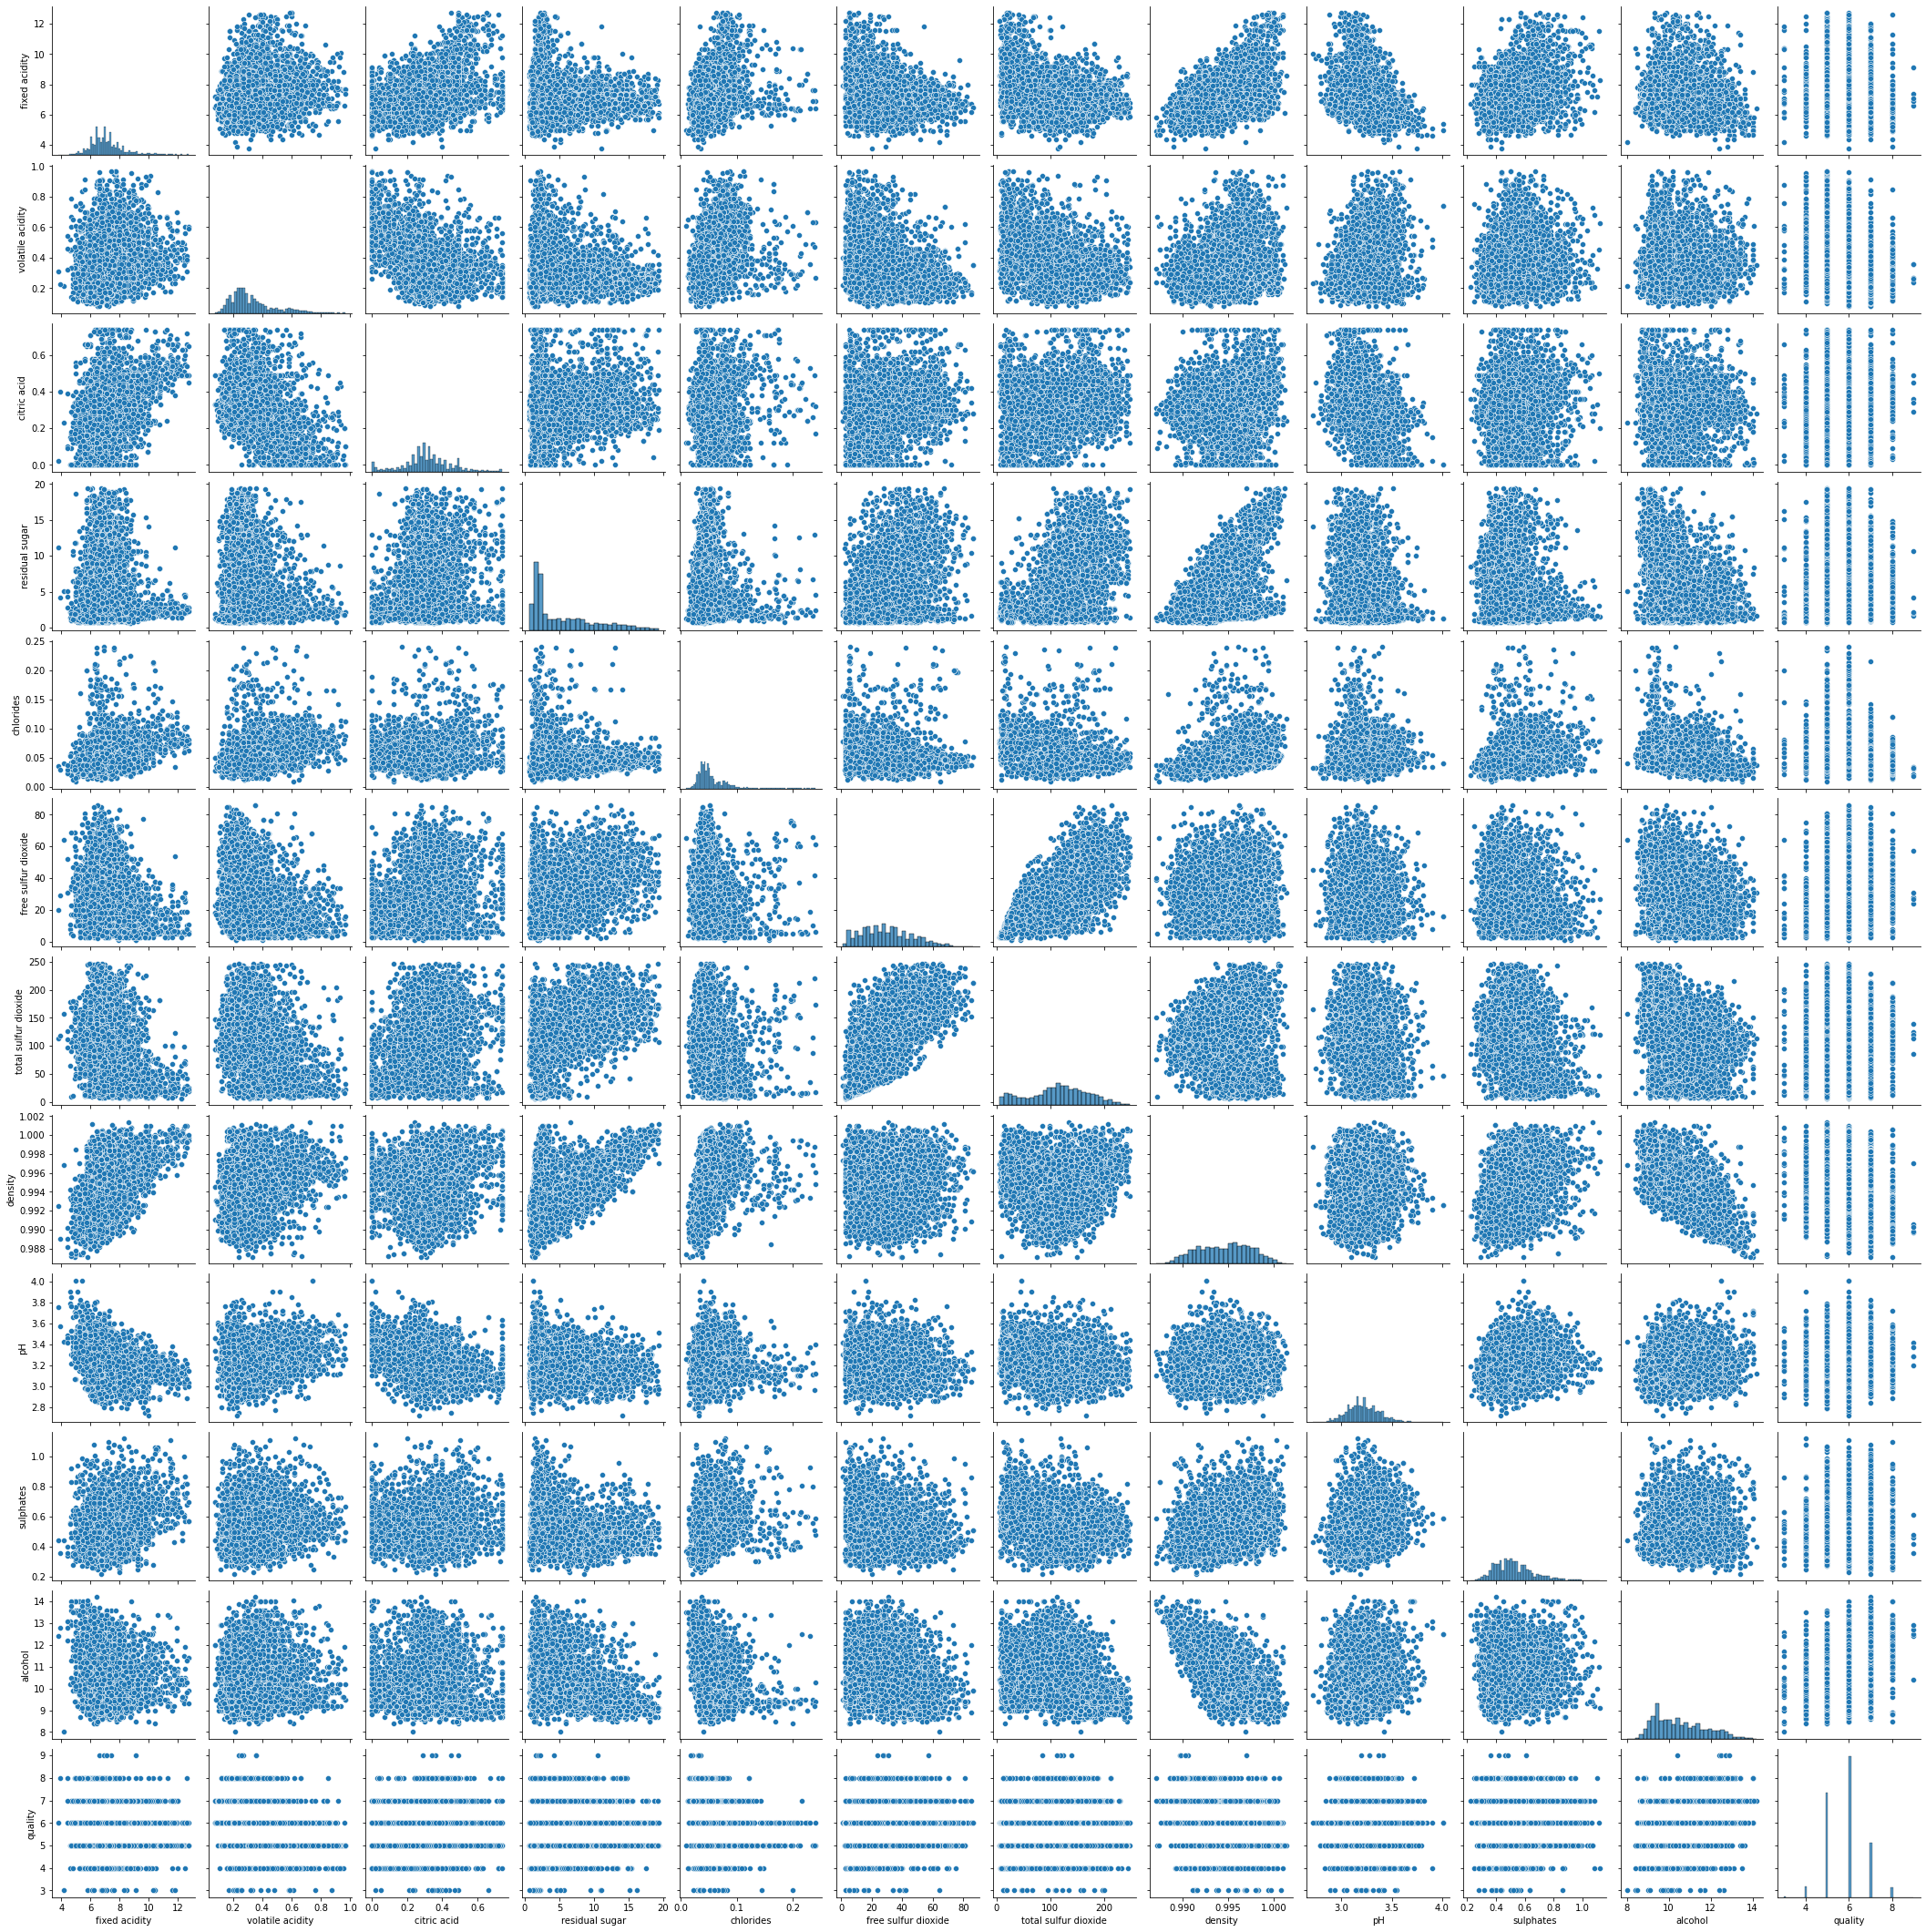

In [20]:
sns.pairplot(crop_data)
pass

И построим матрицу корреляции

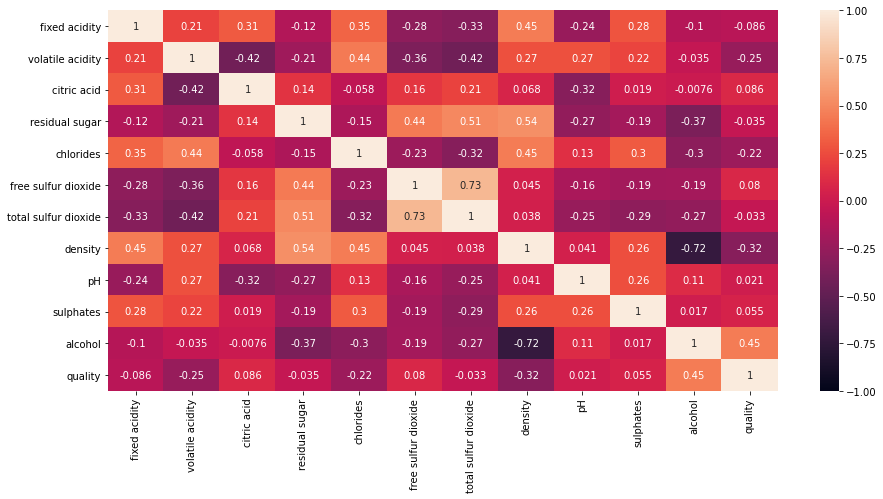

In [28]:
corr_mat = crop_data.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot=True)
pass

Видно, что большинство признаков не сильно коррелитуют между собой. Однако, возможно, что некоторые стоит исключить. Но, судя по диаграмме рассеивания, признаки не кореллируют на всем диапазоне своих значений. Поэтому не стоит исключать ни один признак

Посмотрим, какое влияние признак оказывает на *quality*

In [113]:
np.abs(corr_mat['quality']).sort_values()

pH                      0.021196
total sulfur dioxide    0.033035
residual sugar          0.035488
sulphates               0.054796
free sulfur dioxide     0.079809
fixed acidity           0.086005
citric acid             0.086060
chlorides               0.224113
volatile acidity        0.249343
density                 0.318818
alcohol                 0.450060
quality                 1.000000
Name: quality, dtype: float64

Видно, что  *density* и *alcohol* в достаточной степени вляют на *quality*.

Можно получить отдельные графики корреляционных матриц для красного и белого вина:

In [114]:
red_corr_mat = crop_data[crop_data['color'] == 'red'].corr()
np.abs(red_corr_mat['quality']).sort_values()

residual sugar          0.001132
pH                      0.039292
free sulfur dioxide     0.048400
fixed acidity           0.098541
chlorides               0.140821
citric acid             0.211913
total sulfur dioxide    0.218717
density                 0.229538
volatile acidity        0.358285
sulphates               0.367393
alcohol                 0.508565
quality                 1.000000
Name: quality, dtype: float64

In [115]:
white_corr_mat = crop_data[crop_data['color'] == 'white'].corr()
np.abs(white_corr_mat['quality']).sort_values()

citric acid             0.002995
free sulfur dioxide     0.040892
sulphates               0.053503
residual sugar          0.093497
pH                      0.095847
fixed acidity           0.107733
total sulfur dioxide    0.154120
volatile acidity        0.184808
chlorides               0.212607
density                 0.313607
alcohol                 0.435672
quality                 1.000000
Name: quality, dtype: float64

Действительно, и на качество красного, и на качество белого вина самое сильное влияние оказывает количество алкоголя. Однако, на красное оно влияет сильнее. А также следующие по встепени влияния признаки значительно отличаются.
Из данных видно, что *sulphates* и  *volatile acidity* в большей степени влияет на качество красного вина, в то время как на качество белого вина влияют *density* и *chlorides*.
Возможно, было бы лучше обрабатывать белые и красные вина отдельно. 
Но в этой работе, данных для белого вина (~ 5k) и красного (~1.5k) не так много, а признаков достаточно. Разбивать такие данные (красное) на тестовую и обучающую выборки не очень хорошо, так как может быть слишком большой разброс из-за малого количества данных и результат будет очень сильно зависить от этого разбиения.

# 3. Обработка пропущенных значений
Проверим, что пропущенные значения отсутствуют 

In [116]:
crop_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

# 4. Обработка категориальных признаков

Так как в данных присутствует единственный категориальный признак - цвет вина (color), принимающий значения красное/белое, приведем его бинарному признаку.

In [117]:
bin_data = crop_data.replace({'color': {'red': 1, 'white': 0}})
bin_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5      1  
1         9.8        5      1  
2         9.8        5      1  
3         9.8        6      1  
4         9.4        5      1  
...       ...      ...    ...  
6492     11.2        6      0  
6493      9.6        5      0  
6494      9.4        6      0  
6495     12.8        7      0  
6496     11.8        6      0  

[6262 rows x 13 columns]

# 5. Нормализация

Для того, чтобы признаки оказывали одинаковое влияние на результат вычислений,произведем нормализацию количественных признаков  с помощью стандартизации

In [118]:
data_stand = (bin_data - bin_data.mean(axis = 0))/bin_data.std(axis = 0)
data_stand.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   6.262000e+03      6.262000e+03  6.262000e+03    6.262000e+03   
mean    5.007936e-15     -2.084267e-14  5.711955e-14   -5.655205e-15   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -2.792407e+00     -1.631569e+00 -2.279435e+00   -1.041852e+00   
25%    -6.377938e-01     -6.702605e-01 -4.672176e-01   -7.791059e-01   
50%    -1.405755e-01     -2.857369e-01 -3.228537e-02   -5.163602e-01   
75%     3.566429e-01      4.192230e-01  5.476242e-01    5.784137e-01   
max     4.582999e+00      4.040154e+00  3.084729e+00    3.074498e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  6.262000e+03         6.262000e+03          6.262000e+03  6.262000e+03   
mean   1.767237e-14         8.482693e-17          8.187496e-17  3.008398e-12   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.739442e+00        -1.762484e+00         -1.989778e+00 -2.597171e+00   
25%   -6.163920e-01        -7.974338e-01         -6.609910e-01 -8.132467e-01   
50%   -2.678591e-01        -7.364632e-02          4.890884e-02  7.567426e-02   
75%    3.517549e-01         6.501412e-01          7.224036e-01  7.882013e-01   
max    7.244960e+00         3.364344e+00          2.397039e+00  2.369664e+00   

                 pH     sulphates       alcohol       quality         color  
count  6.262000e+03  6.262000e+03  6.262000e+03  6.262000e+03  6.262000e+03  
mean  -3.311813e-14 -1.612490e-14 -2.121959e-14  3.653151e-15  3.267850e-14  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
min   -3.140336e+00 -2.274947e+00 -2.106146e+00 -3.267493e+00 -5.567695e-01  
25%   -6.947871e-01 -7.115125e-01 -8.472454e-01 -9.605938e-01 -5.567695e-01  
50%   -6.772329e-02 -1.903676e-01 -1.758319e-01  1.928556e-01 -5.567695e-01  
75%    6.220469e-01  5.541251e-01  6.634349e-01  1.928556e-01 -5.567695e-01  
max    4.948787e+00  4.425487e+00  3.097309e+00  3.653204e+00  1.795788e+00

# 6. Разбить данные на обучающую и тестовую выборки
(попробовать разное их количество)



In [119]:
input_data = data_stand.drop(['quality'], axis = 1)
output_data = bin_data['quality']
input_data.shape, output_data.shape

((6262, 12), (6262,))

Также нужно разделить наши данные на обучающую и тестовую выборки случайным образом в отношении 75% на 25%:

In [120]:
from sklearn.model_selection import train_test_split
in_train, in_test, out_train, out_test = train_test_split(input_data, output_data, test_size = 0.25, random_state = 9)
in_train.shape, in_test.shape, out_train.shape, out_test.shape

((4696, 12), (1566, 12), (4696,), (1566,))

# 7. Запустить классификатор ближайших соседей 

Теперь попробуем произвести анализ методом ближайших соседей. В качестве примера будет взято 4 соседа:

In [121]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(in_train, out_train)
pass

# 8. Вычислить ошибки на обучающей и тестовой выборках. 

In [122]:
model.score(in_train, out_train), model.score(in_test, out_test)

(0.7267887563884157, 0.5734355044699873)

In [260]:
from sklearn.metrics import classification_report
rep = classification_report(out_test, model.predict(in_test))
print(rep)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.21      0.12      0.15        50
           5       0.58      0.66      0.62       523
           6       0.59      0.62      0.60       690
           7       0.59      0.43      0.50       262
           8       0.32      0.19      0.24        36
           9       0.00      0.00      0.00         1

    accuracy                           0.57      1566
   macro avg       0.33      0.29      0.30      1566
weighted avg       0.57      0.57      0.57      1566



Как видно, результат не самый хороший, посмотрим в каких классах больше всего ошибок, для этого построим матрицу согласования:

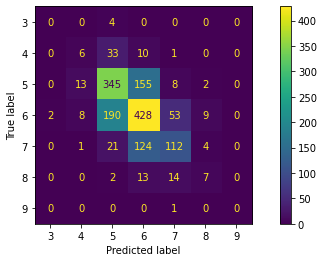

In [123]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 4))
plt.grid(False)
plot_confusion_matrix(model, in_test, out_test, normalize=None, ax=ax)
pass

Видно, что больше всего ошибок приходится на соседние классы - 5, 6, 7. Вероятнее всего, это происходит из-за того, что классификатор определяет качество вина по признакам с помощью алгоритма, в то время как качество *(quality)* проставлялось людьми с некоторой погрешностью (округлением) для каждого признака или вообще, может быть, и без его учета. 
Пожалуй, классификатор ближайших соседей не самый подходящий для такой задачи, поэтому попробуем ее видоизменить

# 10 Избавляемся с несбалансированностью классов качества

Для получения более высокой точности классификации стоит разделить качество не на 10 классов, а хотя бы на три: 0-5- плохое, 6 -нормальное и 7-10 -хорошее.

In [124]:
unite_data = crop_data.copy()

unite_data.loc[crop_data['quality'] <= 5, 'quality'] = 1
unite_data.loc[(crop_data['quality'] == 6), 'quality'] = 2
unite_data.loc[(crop_data['quality'] >= 7) , 'quality'] = 3

unite_data['quality'].value_counts()

2    2746
1    2261
3    1255
Name: quality, dtype: int64

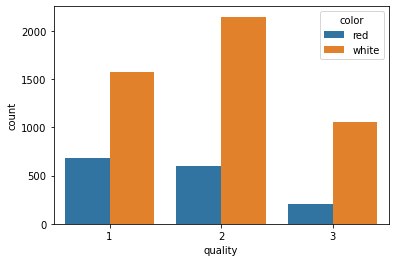

In [125]:
sns.countplot(x="quality", hue="color", data=unite_data)
pass

In [126]:
bin_unite_data = unite_data.replace({'color': {'red': 1, 'white': 0}})
unite_stand = (bin_unite_data - bin_unite_data.mean(axis = 0))/bin_unite_data.std(axis = 0)

input_unite_data = unite_stand.drop(['quality'], axis = 1)
output_unite_data = bin_unite_data['quality']
print(input_unite_data.shape, output_unite_data.shape)

from sklearn.model_selection import train_test_split
in_unite_train, in_unite_test, out_unite_train, out_unite_test = train_test_split(input_unite_data, output_unite_data, test_size = 0.25, random_state = 9)
in_unite_train.shape, in_unite_test.shape, out_unite_train.shape, out_unite_test.shape

(6262, 12) (6262,)


((4696, 12), (1566, 12), (4696,), (1566,))

## Еще раз запустим классификатор ближайших соседей 

In [261]:
from sklearn.neighbors import KNeighborsClassifier
unite_model = KNeighborsClassifier(n_neighbors = 4)
unite_model.fit(in_unite_train, out_unite_train)
unite_model.score(in_unite_train, out_unite_train), unite_model.score(in_unite_test, out_unite_test)

(0.758304940374787, 0.6277139208173691)

In [262]:
from sklearn.metrics import classification_report
rep = classification_report(out_unite_test, unite_model.predict(in_unite_test))
print(rep)

              precision    recall  f1-score   support

           1       0.64      0.75      0.69       577
           2       0.60      0.59      0.60       690
           3       0.67      0.47      0.55       299

    accuracy                           0.63      1566
   macro avg       0.64      0.61      0.61      1566
weighted avg       0.63      0.63      0.62      1566



Как видно, точность повысилась, выведем в каких классах больше всего ошибок:

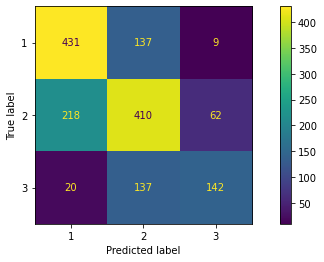

In [128]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 4))
plt.grid(False)
plot_confusion_matrix(unite_model, in_unite_test, out_unite_test, normalize=None, ax=ax)
pass

Большинство ошибок появляется при неверном определении 2 класса, и при определении 1 и 3 классов, часть данных определяется как 2. Это происходит, скорее всего, из-за того, что качество (quality) проставлялось людьми с некоторой погрешностью (округлением) для каждого признака или вообще, может быть, и без его учета. Т.е. смежные признаки плохо отделимы.

C помощью балансировки классов, получилось добиться лучшего результата для knn

### Попробуем подобрать оптимальное число соседей

In [171]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid = {'n_neighbors': nnb})
grid_knn.fit(in_unite_train, out_unite_train)

best_cv_score = grid_knn.best_score_
best_cv_err = 1 - best_cv_score
best_n_neighbors = grid_knn.best_estimator_.n_neighbors
print("Лучший результат ", best_cv_score)
print("Меньшая ошибка ", best_cv_err)
print("Число соседей ", best_n_neighbors)

Лучший результат  0.6571551899938821
Меньшая ошибка  0.3428448100061179
Число соседей  1


In [172]:
best_knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)
best_knn.fit(in_unite_train, out_unite_train)
best_knn.score(in_unite_train, out_unite_train), best_knn.score(in_unite_test, out_unite_test)

(1.0, 0.6590038314176245)

In [263]:
rep = classification_report(out_unite_test, best_knn.predict(in_unite_test))
print(rep)

              precision    recall  f1-score   support

           1       0.69      0.68      0.68       577
           2       0.64      0.66      0.65       690
           3       0.64      0.63      0.64       299

    accuracy                           0.66      1566
   macro avg       0.66      0.65      0.66      1566
weighted avg       0.66      0.66      0.66      1566



## Теперь проверим теорию из второго пункта, что красные и белые вина лучше обрабатывать отдельно. 
Попробуем запустить только с белым вином, так как слишком мало данных с красным, чтобы разбить его на выборки:

In [173]:
red_index = unite_stand[(bin_data['color'] == 1)]

input_white_data = unite_stand.drop(red_index.index)
input_white_data = input_white_data.drop(['quality'], axis = 1)

bin_white_data = bin_unite_data[bin_unite_data['color'] == 0]
output_white_data = bin_white_data['quality']

input_white_data.shape, output_white_data.shape

((4780, 12), (4780,))

In [174]:
from sklearn.model_selection import train_test_split
in_white_train, in_white_test, out_white_train, out_white_test = train_test_split(input_white_data, output_white_data, test_size = 0.25, random_state = 6) 
in_white_train.shape, in_white_test.shape, out_white_train.shape, out_white_test.shape

((3585, 12), (1195, 12), (3585,), (1195,))

In [175]:
from sklearn.neighbors import KNeighborsClassifier
model_white = KNeighborsClassifier(n_neighbors = 1)
model_white.fit(in_white_train, out_white_train)
model_white.score(in_white_train, out_white_train), model_white.score(in_white_test, out_white_test)

(1.0, 0.6728033472803348)

In [265]:
rep = classification_report(out_white_test, model_white.predict(in_white_test))
print(rep)

              precision    recall  f1-score   support

           1       0.69      0.69      0.69       387
           2       0.68      0.66      0.67       552
           3       0.64      0.68      0.66       256

    accuracy                           0.67      1195
   macro avg       0.67      0.68      0.67      1195
weighted avg       0.67      0.67      0.67      1195



Да, действительно, результат для белого вина оказался лучше, чем на красного и белого вместе

## PCA

In [271]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pcaDuo = pca.fit_transform(input_unite_data)
pcaDuo 

array([[ 4.08278957, -0.18040556],
       [ 4.08971758, -0.8698609 ],
       [ 4.03914932, -0.60369714],
       ...,
       [-0.91880599,  0.62994495],
       [-1.01508119,  3.57549646],
       [-1.33730661,  2.86800384]])

применим knn

In [272]:
X_train, X_test, Y_train, Y_test = train_test_split(pcaDuo, output_unite_data, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

4696 1566


In [273]:
knn_pca = KNeighborsClassifier(n_neighbors = 1)
knn_pca.fit(X_train, Y_train)
knn_pca.score(X_train, Y_train), knn_pca.score(X_test, Y_test)

(1.0, 0.5964240102171137)

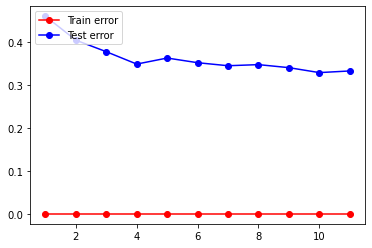

In [274]:
comp = range(1, 12, 1)
err_train_mas = []
err_test_mas = []
for temp in comp:
    
    pca = PCA(n_components = temp)
    pcaFit = pca.fit_transform(input_unite_data)
    X_train, X_test, y_train, y_test = train_test_split(pcaFit, output_unite_data, test_size = 0.25, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
    err_train_mas.append(np.mean(knn.predict(X_train) != y_train))
    err_test_mas.append(np.mean(knn.predict(X_test) != y_test))
plt.plot(comp, err_train_mas, 'r-o', label = 'Train error')
plt.plot(comp, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)
pass

In [275]:
print("Min err: ", min(err_test_mas))
print("Best number of components: ", comp[err_test_mas.index(min(err_test_mas))])

Min err:  0.3282247765006386
Best number of components:  10


In [276]:
knn_pca = KNeighborsClassifier(n_neighbors = 10)
knn_pca.fit(X_train, Y_train)
knn_pca.score(X_train, Y_train), knn_pca.score(X_test, Y_test)

(0.6812180579216355, 0.5759897828863346)

In [278]:
rep = classification_report(Y_test, knn_pca.predict(X_test))
print(rep)

              precision    recall  f1-score   support

           1       0.62      0.65      0.63       562
           2       0.55      0.59      0.57       703
           3       0.55      0.42      0.48       301

    accuracy                           0.58      1566
   macro avg       0.57      0.55      0.56      1566
weighted avg       0.57      0.58      0.57      1566



Использование метода главных компонент дал лучший результат в работе KNN
C увеличением количества главных компонент уменьшается ошибка. Наименьшая ошибка достигается при 10 компонентах.

# 9. Другие классификаторы

## SVM — Support Vector Machine

In [61]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(in_unite_train, out_unite_train)
svc_model.score(in_unite_train, out_unite_train), svc_model.score(in_unite_test, out_unite_test)

(0.6548126064735945, 0.6264367816091954)

In [63]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

На этой выборке SVM показал похожий результат:

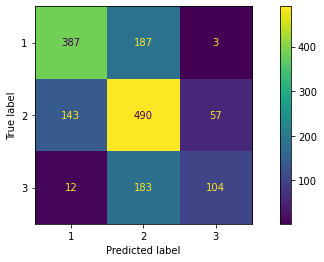

In [64]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.grid(False)
plot_confusion_matrix(svc_model, in_unite_test, out_unite_test, normalize = None, ax = ax)
pass

Получаем примерно ту же картину, что и в knn, так как смежные признаки плохо отделимы.

можно попробовать запустить на исходных 10 классах и результат должен быть хуже:

In [144]:
svc_10_model = SVC()
svc_10_model.fit(in_train, out_train)
svc_10_model.score(in_train, out_train), svc_10_model.score(in_test, out_test)

(0.6020017035775128, 0.590676883780332)

In [279]:
rep = classification_report(out_test, svc_10_model.predict(in_test))
print(rep)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        50
           5       0.66      0.62      0.64       523
           6       0.55      0.79      0.65       690
           7       0.63      0.23      0.34       262
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1566
   macro avg       0.26      0.23      0.23      1566
weighted avg       0.57      0.59      0.55      1566



Однако, на этих данных метод сработал немного лучше knn

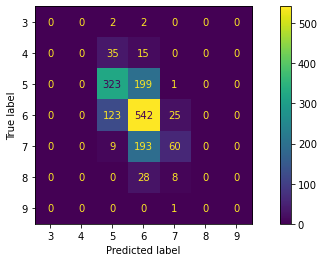

In [145]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.grid(False)
plot_confusion_matrix(svc_10_model, in_test, out_test, normalize = None, ax = ax)
pass

На этой выборке SVM не показал хорошего результата: классификатор не определяет классы, в которых изначально было мало значений.
Были полностью проигнорированы классы с малым количеством данных. Для  классов с плохим вином (<=4) вся группа была определена в классы с качесвом получше(5,6), да и большую часть вин хорошего качества классификатор отнес к классам с качеством хуже. 
Так что здесь такой большой скор только из-за несбалансированности данных

In [177]:
model_svc_white = SVC()
model_svc_white.fit(in_white_train, out_white_train)
model_svc_white.score(in_white_train, out_white_train), model_svc_white.score(in_white_test, out_white_test)

(0.6613668061366806, 0.6225941422594142)

In [280]:
rep = classification_report(out_white_test, model_svc_white.predict(in_white_test))
print(rep)

              precision    recall  f1-score   support

           1       0.70      0.65      0.67       387
           2       0.58      0.71      0.64       552
           3       0.62      0.40      0.49       256

    accuracy                           0.62      1195
   macro avg       0.63      0.59      0.60      1195
weighted avg       0.63      0.62      0.62      1195



И снова, обрабатывая только белые вина, можно получить лучшый результат. И тут, сравнивая с knn, результат хуже

## Decision Tree

In [146]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model.fit(in_unite_train, out_unite_train)
dtree_model.score(in_unite_train, out_unite_train), dtree_model.score(in_unite_test, out_unite_test)

(1.0, 0.6245210727969349)

In [147]:
dtree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

На тренеровочной выборке произошло переобучение, но если уменьшить длину дерева, то результат будет хуже, зато уже без переобучения:

In [148]:
dtree_model_2 = DecisionTreeClassifier(max_depth=4)
dtree_model_2.fit(in_unite_train, out_unite_train)
dtree_model_2.score(in_unite_train, out_unite_train), dtree_model_2.score(in_unite_test, out_unite_test)

(0.5911413969335605, 0.5708812260536399)

Выведем признаки и вклад, который они внесли:

In [149]:
importances = dtree_model.feature_importances_
feature_list = list(in_unite_test.columns)
indices = np.argsort(importances)
indx = 1
for f in range(len(importances)-1,-1,-1):
    print(indx, feature_list[indices[f]], importances[indices[f]])
    indx+=1

1 alcohol 0.16489012404126616
2 volatile acidity 0.11031500297487781
3 total sulfur dioxide 0.09657412464820668
4 sulphates 0.09525369363188149
5 density 0.08660349269912755
6 free sulfur dioxide 0.08544794526658835
7 citric acid 0.0766666610646541
8 pH 0.07512399794606345
9 residual sugar 0.0747983748271293
10 chlorides 0.07383499156519634
11 fixed acidity 0.058867927085025716
12 color 0.0016236642499831385


Теперь можно посмотреть на работу классификатора с классами без балансировки:

In [281]:
dtree_10_model = DecisionTreeClassifier()
dtree_10_model.fit(in_train, out_train)
dtree_10_model.score(in_train, out_train), dtree_10_model.score(in_test, out_test)

(1.0, 0.5791826309067688)

In [282]:
rep = classification_report(out_test, dtree_10_model.predict(in_test))
print(rep)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.22      0.20      0.21        50
           5       0.62      0.62      0.62       523
           6       0.61      0.62      0.61       690
           7       0.54      0.50      0.52       262
           8       0.28      0.42      0.33        36
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1566
   macro avg       0.32      0.34      0.33      1566
weighted avg       0.58      0.58      0.58      1566



Как и ожидалось, результ стал хуже

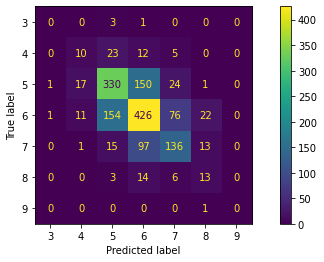

In [151]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.grid(False)
plot_confusion_matrix(dtree_10_model, in_test, out_test, normalize = None, ax = ax)
pass

Попробуем запустить классификатор только для белого вина

In [178]:
dtree_white_model = DecisionTreeClassifier()
dtree_white_model.fit(in_white_train, out_white_train)
dtree_white_model.score(in_white_train, out_white_train), dtree_white_model.score(in_white_test, out_white_test)

(1.0, 0.6410041841004184)

In [283]:
rep = classification_report(out_white_test, dtree_white_model.predict(in_white_test))
print(rep)

              precision    recall  f1-score   support

           1       0.66      0.63      0.64       387
           2       0.65      0.64      0.64       552
           3       0.60      0.66      0.63       256

    accuracy                           0.64      1195
   macro avg       0.64      0.64      0.64      1195
weighted avg       0.64      0.64      0.64      1195



На этих выборках результат улучшился, так что с данным классификатором идея обрабатывать вина разного цвета оправдывается больше, чем в других классификаторах.
При этом, на выборках с белым вином, результ лучше SVM, но хуже KNN

## Random Forest

In [284]:
from sklearn import ensemble
rf_model = ensemble.RandomForestClassifier()
rf_model.fit(in_unite_train, out_unite_train)

rf_model.score(in_unite_train, out_unite_train), rf_model.score(in_unite_test, out_unite_test)

(1.0, 0.7113665389527458)

In [285]:
rep = classification_report(out_unite_test, rf_model.predict(in_unite_test))
print(rep)

              precision    recall  f1-score   support

           1       0.78      0.73      0.75       577
           2       0.66      0.75      0.70       690
           3       0.73      0.59      0.65       299

    accuracy                           0.71      1566
   macro avg       0.72      0.69      0.70      1566
weighted avg       0.72      0.71      0.71      1566



Random Forest показал лучший результат на сбалансированных данных

In [286]:
rf_10_model = ensemble.RandomForestClassifier()
rf_10_model.fit(in_train, out_train)

rf_10_model.score(in_train, out_train), rf_10_model.score(in_test, out_test)

(1.0, 0.6787994891443168)

In [287]:
rep = classification_report(out_test, rf_10_model.predict(in_test))
print(rep)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.88      0.14      0.24        50
           5       0.72      0.70      0.71       523
           6       0.65      0.79      0.71       690
           7       0.69      0.51      0.59       262
           8       0.71      0.33      0.45        36
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1566
   macro avg       0.52      0.35      0.39      1566
weighted avg       0.69      0.68      0.67      1566



Этот результат тоже чуть выше, чем на других классификаторах

In [288]:
rf_white_model = ensemble.RandomForestClassifier()
rf_white_model.fit(in_white_train, out_white_train)

rf_white_model.score(in_white_train, out_white_train), rf_white_model.score(in_white_test, out_white_test)

(1.0, 0.7087866108786611)

In [289]:
rep = classification_report(out_white_test, rf_white_model.predict(in_white_test))
print(rep)

              precision    recall  f1-score   support

           1       0.75      0.71      0.73       387
           2       0.67      0.75      0.71       552
           3       0.74      0.63      0.68       256

    accuracy                           0.71      1195
   macro avg       0.72      0.69      0.71      1195
weighted avg       0.71      0.71      0.71      1195



На данных с белым вином Random Forest показал лучший результат, по сравнению с SVM, KNN и Decision Tree.

## Полносвязная (неглубокая) нейронная сеть

In [225]:
import warnings
warnings.filterwarnings('ignore')

In [226]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (20, 2), solver = 'lbfgs', 
                           activation = 'relu', random_state = 19)

In [227]:
mlp_model.fit(in_unite_train, out_unite_train)
mlp_model.score(in_unite_train, out_unite_train), mlp_model.score(in_unite_test, out_unite_test)

(0.6479982964224872, 0.6111111111111112)

In [228]:
mlp_model = MLPClassifier(hidden_layer_sizes = (10,3))
mlp_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10, 3),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [236]:
mlp_model.fit(in_unite_train, out_unite_train)
mlp_model.score(in_unite_train, out_unite_train), mlp_model.score(in_unite_test, out_unite_test)

(0.6341567291311755, 0.6187739463601533)

In [237]:
alpha_arr = np.logspace(-3, 2, 21)
err_unite_train_list = []
err_unite_test_list = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 19)
    mlp_model.fit(in_unite_train, out_unite_train)

    err_unite_train_list.append(np.mean(out_unite_train != mlp_model.predict(in_unite_train)))
    err_unite_test_list.append(np.mean(out_unite_test != mlp_model.predict(in_unite_test)))

Рассмотрим изменение метрики в зависимости от гиперпараметра alpha

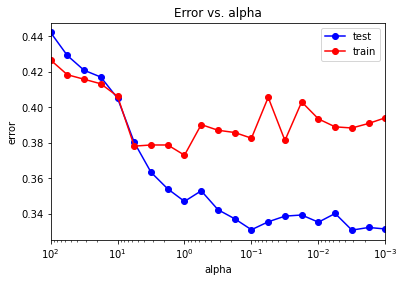

In [238]:
plt.semilogx(alpha_arr, err_unite_train_list, 'b-o', label = 'test')
plt.semilogx(alpha_arr, err_unite_test_list, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Выведем минимальное значение ошибки и оптимальное значение alpha

In [239]:
min_train_err = np.min(err_unite_train_list)
min_test_err = np.min(err_unite_test_list)
alpha_opt = alpha_arr[err_unite_test_list == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Alpha: ', alpha_opt)

Min train error: 0.3307069846678024, 	Min test error: 0.37292464878671777
Alpha:  1.0


Классификатор при найденном оптимальном значении alpha:

In [240]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (20, 2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(in_unite_train, out_unite_train)
print('train accuracy = ', mlp_model.score(in_unite_train, out_unite_train), '| test accuracy = ', mlp_model.score(in_unite_test, out_unite_test))
print('train err = ', 1 - mlp_model.score(in_unite_train, out_unite_train), '| test err = ', 1 - mlp_model.score(in_unite_test, out_unite_test))

train accuracy =  0.6571550255536627 | test accuracy =  0.5977011494252874
train err =  0.3428449744463373 | test err =  0.4022988505747126


Рассмотрим изменение метрики в зависимости от количества нейронов

In [248]:
neurons_arr = np.arange(10,150, 5)
err_unite_train_list = []
err_unite_test_list = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neuron,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(in_unite_train, out_unite_train)

    err_unite_train_list.append(np.mean(out_unite_train != mlp_model.predict(in_unite_train)))
    err_unite_test_list.append(np.mean(out_unite_test != mlp_model.predict(in_unite_test)))

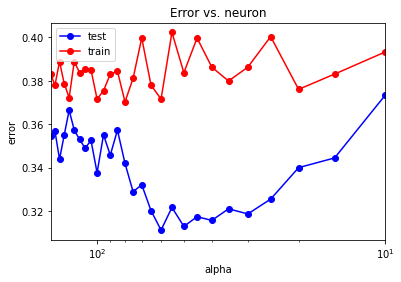

In [249]:
plt.semilogx(neurons_arr, err_unite_train_list, 'b-o', label = 'test')
plt.semilogx(neurons_arr, err_unite_test_list, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neuron')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [250]:
min_train_err = np.min(err_unite_train_list)
min_test_err = np.min(err_unite_test_list)
neuron_opt = neurons_arr[err_unite_test_list == min_test_err][0]

print('Min train error:', min_train_err, 'Min test error: ', min_test_err)
print('Neuron: ', neuron_opt)

Min train error: 0.3113287904599659 Min test error:  0.37037037037037035
Neuron:  80


In [251]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(in_unite_train, out_unite_train)
print('train accuracy = ', mlp_model.score(in_unite_train, out_unite_train), '| test accuracy = ', mlp_model.score(in_unite_test, out_unite_test))
print('train err = ', 1 - mlp_model.score(in_unite_train, out_unite_train), '| test err = ', 1 - mlp_model.score(in_unite_test, out_unite_test))

train accuracy =  0.643526405451448 | test accuracy =  0.6257982120051085
train err =  0.356473594548552 | test err =  0.37420178799489145


Рассмотрим изменение метрики в зависимости от количества нейронов при известном alpha

In [252]:
neurons_arr = np.arange(10,150, 5)
err_unite_train_list = []
err_unite_test_list = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(in_unite_train, out_unite_train)

    err_unite_train_list.append(np.mean(out_unite_train != mlp_model.predict(in_unite_train)))
    err_unite_test_list.append(np.mean(out_unite_test != mlp_model.predict(in_unite_test)))

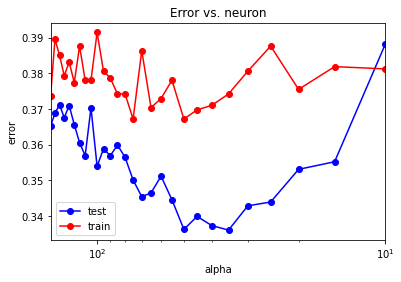

In [253]:
plt.semilogx(neurons_arr, err_unite_train_list, 'b-o', label = 'test')
plt.semilogx(neurons_arr, err_unite_test_list, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neuron')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [254]:
min_train_err = np.min(err_unite_train_list)
min_test_err = np.min(err_unite_test_list)
neuron_opt = neurons_arr[err_unite_test_list == min_test_err][0]

print('Min train error:', min_train_err, 'Min test error: ', min_test_err)
print('Neuron: ', neuron_opt)

Min train error: 0.33603066439523 Min test error:  0.36717752234993617
Neuron:  50


In [255]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt, 2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(in_unite_train, out_unite_train)
print('train accuracy = ', mlp_model.score(in_unite_train, out_unite_train), '| test accuracy = ', mlp_model.score(in_unite_test, out_unite_test))
print('train err = ', 1 - mlp_model.score(in_unite_train, out_unite_train), '| test err = ', 1 - mlp_model.score(in_unite_test, out_unite_test))

train accuracy =  0.6431005110732538 | test accuracy =  0.6174968071519795
train err =  0.35689948892674617 | test err =  0.3825031928480205


Использование нейронной сети не дало лучшего результата по сравнению с рассмотренными ранее классификаторами

### 12. Выводы

В результате данной работы на основе датасета с различными химико-физическими показателями сортов вин было исследовано  несколько стандартных методов машинного обучения. 
Исходя из полученных результатов можно сделать вывод, что наиболее подходящим из рассмотренных методов является Random forest, поскольку он показывает наилучший результат. Также, на основе анализа признаков, были рассмотрены данные только с белым вином, результат для них по некоторым классификаторам был выше, чем для сбалансированных классов.

Применение нейронных сетей не помогло как-то улучшить результат по точности. Возможно, упомянутые выше предположения о причине такой точности применимы и тут (смежные классы плохо отдемимы).